# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df=pd.merge(study_results,mouse_metadata,how='left',on="Mouse ID")

# Display the data table for preview
mice_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df=mice_df[mice_df.duplicated(subset=['Mouse ID','Timepoint'])]
df['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df[mice_df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
mice2_df=mice_df.drop(mice_df[mice_df['Mouse ID']=='g989'].index)
mice2_df.reset_index(drop=True,inplace=True)
mice2_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice2_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_df=mice2_df.groupby(['Drug Regimen'])
mean_tumor=drug_df['Tumor Volume (mm3)'].mean()
median_tumor=drug_df['Tumor Volume (mm3)'].median()
var_tumor=drug_df['Tumor Volume (mm3)'].var()
stdev_tumor=drug_df['Tumor Volume (mm3)'].std()
sterr_tumor=drug_df['Tumor Volume (mm3)'].sem()
names=drug_df.groups.keys()
drug_stat_df=pd.DataFrame(zip(mean_tumor,median_tumor,var_tumor,stdev_tumor,sterr_tumor),columns=['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.'],index=names)
drug_stat_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_stat2_df=mice2_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
drug_stat2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

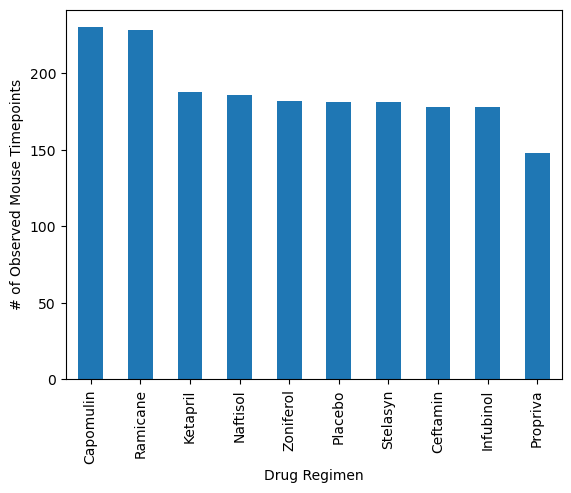

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_df['Drug Regimen'].count().sort_values(ascending=False).plot.bar().set_ylabel('# of Observed Mouse Timepoints')

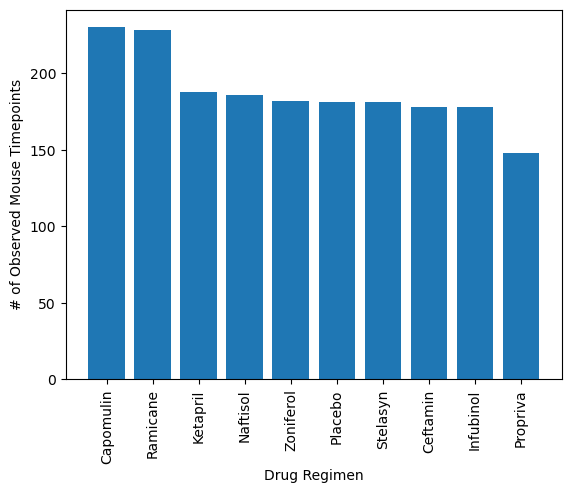

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2_dic=drug_df['Drug Regimen'].count().sort_values(ascending=False).to_dict()
plt.bar(bar2_dic.keys(),bar2_dic.values())
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

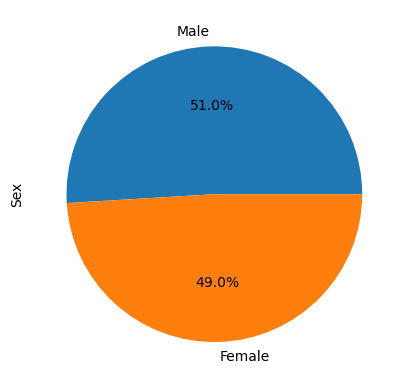

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1=mice2_df['Sex'].value_counts().plot.pie(ylabel='Sex',autopct='%1.1f%%')

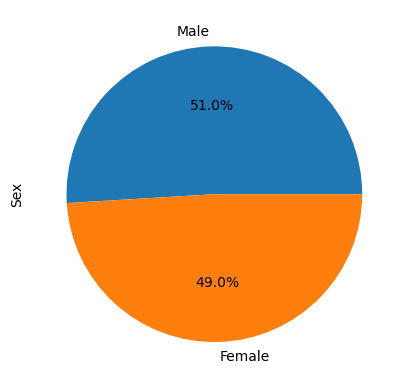

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2_df=mice2_df['Sex'].value_counts().to_frame()
plt.pie(pie2_df['count'],autopct='%1.1f%%',labels=pie2_df.index)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
mice_time_max_df=mice2_df.groupby('Mouse ID',as_index=False)['Timepoint'].max()   # The instructions on Canvas indicate: "The index of the DataFrame is reset. (2 points)"

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_last_tumor_df=pd.merge(mice_time_max_df,mice2_df,how='left',on=["Mouse ID",'Timepoint'])
mice_last_tumor_df=mice_last_tumor_df[mice_last_tumor_df['Drug Regimen'].isin(drug_list)]

mice_last_tumor_df=mice_last_tumor_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
# mice_last_tumor_df.reset_index(drop=True,inplace=True)                           # If the dataframe is reindexed, then the outlier at 36.321346 for Infubinol is not at index=31 anymore as in the example, but at index=15
mice_last_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
3,a275,45,62.999356,Ceftamin
6,a411,45,38.407618,Ramicane
7,a444,45,43.047543,Ramicane
...,...,...,...,...
238,y769,45,68.594745,Ceftamin
239,y793,45,31.896238,Capomulin
240,y865,45,64.729837,Ceftamin
244,z578,45,30.638696,Ramicane


In [101]:
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_scatter_dict={}
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_size_list=mice_last_tumor_df.loc[mice_last_tumor_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    quartile=tumor_size_list.quantile([0.25,0.75])
    iqr=round(quartile[0.75]-quartile[0.25], 2)
    lim_low=quartile[0.25]-1.5*iqr
    lim_high=quartile[0.75]+1.5*iqr
    outlier=tumor_size_list.loc[(tumor_size_list < lim_low) | (tumor_size_list > lim_high)]
    # print(f"{drug}: lower limit {lim_low}, higher limit {lim_high}, IQR= {iqr}")
    print(f"{drug}'s potential outliers: {outlier}")
    tumor_scatter_dict[drug]=tumor_size_list.values





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


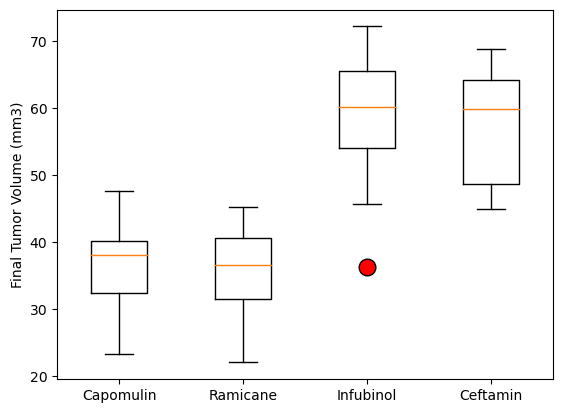

In [111]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_scatter_dict.values(), labels=drug_list, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})

plt.show()

## Line and Scatter Plots

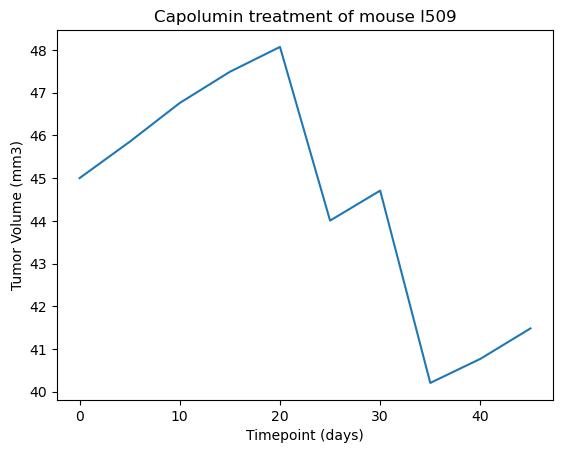

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice2_df[mice2_df['Mouse ID']=='l509'].plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',legend=None,xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)',title='Capolumin treatment of mouse l509')
plt.show()


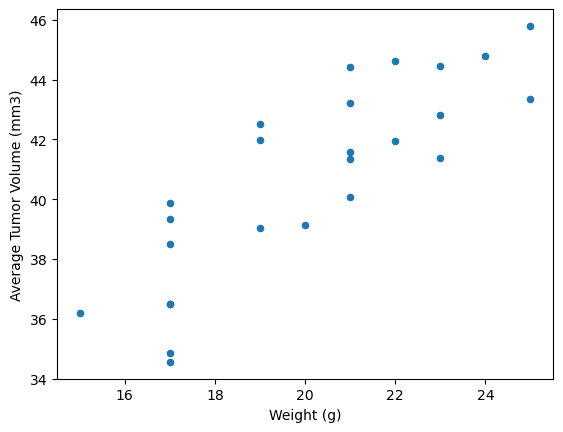

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_df=mice2_df.loc[mice2_df['Drug Regimen']=='Capomulin',:]
a=capomulin_mice_df.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean().to_frame()
b=capomulin_mice_df.groupby(['Mouse ID'])['Weight (g)'].mean().to_frame()
capomulin_scatter_df=pd.merge(b,a,on="Mouse ID",how="left")
capomulin_scatter_df.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',legend=None,ylabel='Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

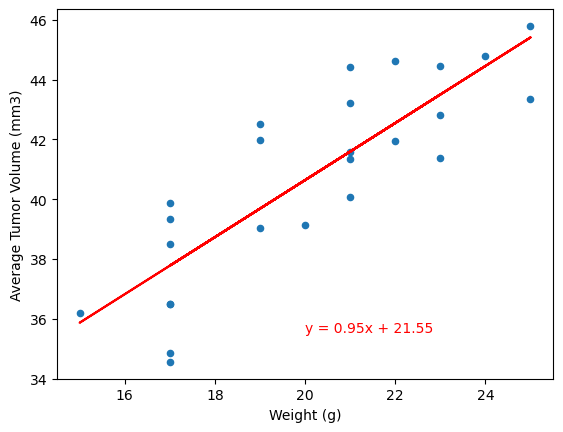

The correlation between mouse weight and the average tumor volume is 0.84


In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
    # Run linear regression
x_values=capomulin_scatter_df['Weight (g)']
y_values=capomulin_scatter_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
capomulin_scatter_df.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',legend=None,ylabel='Average Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5,min(y_values)+1),fontsize=10,color="red")  

# Show plot
plt.show()

# Print r square value
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
